# 環境構築

## Anaconda

### 導入

AnacondaでPythonを導入するのが簡単。
- [Macにインストール](https://weblabo.oscasierra.net/python-anaconda-install-macos/)
- [Linuxにインストール](https://www.digitalocean.com/community/tutorials/how-to-install-the-anaconda-python-distribution-on-ubuntu-16-04)

anacondaがインストールできたら、以下が動作するか確認  
```sh
conda --version```  
動作しない場合は、`~/.bash_profile`にAnacondaへのPATHが追加されているか確認。例えば以下のように記述する。  
```sh
export PATH="/Users/localadmin/anaconda3/bin:$PATH"```



### 仮想環境

次に、仮想環境を構築する。いくつかのプロジェクトに参加する場合、プロジェクト毎に仮想環境を分けておくと良い。
- 例えばpandasなどは、versionによって動いたり動かなったりする構文がある。  

仮想環境の構築方法は以下の通り。  
```sh
conda env create --name <仮想環境の名前>```  

ファイルから仮想環境を作成するときは、`--file`オプションを用いる  
```sh
conda env create --name <仮想環境の名前> --file <ファイルパス>```  

pythonのversionを指定したい場合や、作成時から入れたいlibraryを指定する場合は以下。  
```sh
conda env create --name <仮想環境の名前> python=3.7 flask bokeh seaborn```  

環境をつくったら、以下でその環境に入れる。  
```sh
conda activate <仮想環境の名前>```

環境から抜けるときは、  
```sh
conda deactivate```

環境一覧を見たいときは  
```sh
conda env list```

詳細は[こちら](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)を参照

### ライブラリ

ライブラリをインストールしたいときは  
```sh
conda install <ライブラリ名>```  

versionも指定したいときは、例えば、  
```sh
conda install pandas=0.24.1```

アンインストールしたいときは  
```sh
conda uninstall <ライブラリ名>```

### 仮想環境の書き出し

```sh
conda env export > <吐き出したいファイル名>```  

これで吐き出しておけば、以下のようにして同じ環境を作れる  
```sh
conda env create --name <仮想環境名> --file <吐き出したファイルのパス>```

 ### その他

`~/.bash_profile`に以下を追加しておくと、"environment.yaml"というファイルのあるフォルダに入ったときに、自動でその仮想環境に切り替えてくれるので楽である。  

```sh
# Auto activate conda environments
function conda_auto_env() {
  if [ -e "environment.yaml" ]; then
    ENV_NAME=$(head -n 1 environment.yaml | cut -f2 -d ' ')
    # Check if you are already in the environment
    if [[ $CONDA_PREFIX != *$ENV_NAME* ]]; then
      # Try to activate environment
      source activate $ENV_NAME &>/dev/null
    fi
  fi
}

export PROMPT_COMMAND="conda_auto_env;$PROMPT_COMMAND"
```

## Jupyter Notebook

### 基本動作

分析は(少なくとも眞田実施分については、)基本的にJupyter notebookで実施する。  
Jupyter Notebookは以下で起動できる。
```sh
jupyter notebook```

デフォルトではブラウザが自動で起動する設定になっているが、ブラウザを開いて、"localhost:8888"にアクセスしても、開ける。  

jupter notebookでは、ブラウザの起動の設定や、ポート番号の指定、パスワードの指定などができる。詳細は[こちら](https://jupyter-notebook.readthedocs.io/en/stable/public_server.html)。

Jupyter notebookはコマンドモードと編集モードの2モードがある。
<kbd>Esc</kbd>キーでコマンドモードへ、<kbd>Enter</kbd>キーで編集モードに以降できる。

コマンドモードで<kbd>y</kbd>を押すとプログラム用のセルに、<kbd>m</kbd>を押すとマークダウン用のセルになる。

他、よく使う機能は以下のとおり。
- コマンドモードで<kbd>a</kbd>で上にセルを挿入
- コマンドモードで<kbd>b</kbd>で下にセルを挿入
- コマンドモードで<kbd>d</kbd> ➡ <kbd>d</kbd>でセルを削除
- コマンドモードで<kbd>z</kbd>でセル削除をUndo
- コマンドモードで<kbd>s</kbd>でノートブックを保存
- <kbd>shift</kbd> + <kbd>Enter</kbd>でセルを実行
- コマンドモードで<kbd>shift</kbd> + <kbd>M</kbd>でセルとその下のセルをマージ
- コマンドモードで<kbd>h</kbd>でヘルプを開く
- コマンドモードで<kbd>i</kbd> + <kbd>i</kbd>で実行を中断
- 編集モードで<kbd>&#8984;</kbd> + <kbd>&uarr;</kbd>でセルの先頭へ
- 編集モードで<kbd>&#8984;</kbd> + <kbd>&darr;</kbd>でセルの末尾へ

上部のボタンを押しても動作できる。ヘルプを見ながら、毎日少しずつショートカットを覚えていくと良い。

### カスタマイズ

- 仮想環境を指定のファイルで構築すれば、既に"jupyter_contrib_nbextensions"と"nb_conda"がインストールされている。  
    - 前者はjupyter notebookの拡張機能で、後者はjupyter notebookで使用する仮想環境を指定するためのもの。  
- 例えば眞田は以下のように拡張機能を設定している。各機能の詳細な説明は[こちらがわかりやすい](https://qiita.com/simonritchie/items/88161c806197a0b84174)
![コンフィグ](figures/20190530_nb_extension_config_sanada.png)

**練習**  
- 上記のマークダウンのセルの内容を眺める。一部を変更してみる。
- pythonで簡単な計算をしてみる。1 + 2など
- 上記のコマンドを試してみる

### よく使う機能

In [1]:
%%time

# 実行時間をはかる。
x = 1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [2]:
%time x = 1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [3]:
# シェルを叩く
!ls -lh

total 7568
-rw-r--r--  1 localadmin  staff   1.9M May 30 13:45 0.5_AkihiroSanada_warranty_analysis_note.ipynb
-rw-r--r--  1 localadmin  staff   331K May 30 13:45 0.6_AkihiroSanada_FTIR_data_analysis.ipynb
-rw-r--r--  1 localadmin  staff   515K May 30 13:45 0.7_AkihiroSanada_Data_Dist_Check.ipynb
-rw-r--r--  1 localadmin  staff   762K May 30 19:48 0.8_AkihiroSanada_MCMC_tutorial.ipynb
-rw-r--r--  1 localadmin  staff   1.6K May 30 13:45 0.9_AkihiroSanada_Integrate_Variables.ipynb
-rw-r--r--  1 localadmin  staff    10K May 30 13:45 0.9_AkihiroSanada_tmp_upload_data_to_sql_draft.ipynb
-rw-r--r--  1 localadmin  staff    10K May 30 13:45 0.9_AkihiroSanada_tmp_upload_data_to_sql_draft_2.ipynb
-rw-r--r--  1 localadmin  staff   112K Jun  5 10:56 1.1_AkihiroSanada_ReviewingPython.ipynb
-rw-r--r--  1 localadmin  staff    20K Jun  3 20:21 1.2_AkihiroSanada_Git.ipynb
-rw-r--r--  1 localadmin  staff    70K May 31 17:00 2.1_AkihiroSanada_AWS&TimeSeriesAnalysis.ipynb
drwxr-xr-x  7 localadmin  staff   

In [4]:
!echo $PWD

/Users/localadmin/Documents/GitHub/suzuki_analytics/phase_2/notebooks


In [5]:
import numpy as np # 数値計算

<kbd>tab</kbd>でコード補完をしてくれる

In [6]:
np.absolute

<ufunc 'absolute'>

関数中で<kbd>tab</kbd>を押すと、ヘルプを出せる。最大3回まで押せる。

In [7]:
np.abs()

ValueError: invalid number of arguments

In [ ]:
# ?でもドキュメントは表示できる
?np.abs

# Pythonの復習

## 基本動作

In [8]:
# 代入
x = 1

In [9]:
# 四則演算
1 * 2 + 3 * 4

14

In [10]:
# 累乗
2 ** 3

8

In [11]:
# 商(余りはなし)
5 // 2

2

In [12]:
# 余り
5 % 3

2

In [13]:
# 割り算 (python2では整数同士の割り算は切り捨てられていたがpython3では自動的に浮動少数となる)
5 / 2

2.5

In [14]:
# divmodという関数もある
divmod(5,2) # 2あまり1

(2, 1)

In [15]:
# タプルの展開(後述)を用いて、このように使える
x, y = divmod(5,2)
print("x=", x)
print("y=", y)

x= 2
y= 1


In [16]:
# インデントに厳しい
x = 1
  y = 1

IndentationError: unexpected indent (<ipython-input-16-0589835ac458>, line 3)

In [17]:
x = 1
y = 1

In [18]:
# 変数を削除
del x

In [19]:
x

NameError: name 'x' is not defined

In [20]:
# ガベージコレクトしてメモリを開放する場合
import gc
gc.collect()

8

## データ型

In [21]:
# 整数
type(1)

int

In [22]:
# 浮動少数点
type(1.0)

float

In [23]:
# 文字列
type("1")

str

In [24]:
# リスト
type([1,2,3])

list

In [25]:
# タプル(変更できないリスト)
type((1,2,3))

tuple

In [26]:
# 実はタプルに括弧は必要ないが、つけた方がわかりやすい
x = 1,2,3
type(x)

tuple

In [27]:
# 辞書
d = {"sanada": 4, "akihiro": 2}
type(d)

dict

In [28]:
# セット
s = {"sanada", "tokuda", "morita"}
type(s)

set

In [29]:
# 関数
def plus_one(x):
    return x + 1

type(plus_one)

function

In [30]:
# 型変換
int(10.2)

10

In [31]:
int("10")

10

In [32]:
int("10.2")

ValueError: invalid literal for int() with base 10: '10.2'

In [33]:
1.03e2

103.0

In [34]:
int("1.03e2")

ValueError: invalid literal for int() with base 10: '1.03e2'

In [35]:
float("10.2")

10.2

In [36]:
float("1") # float(1)でも同じ

1.0

## リスト, タプル, 文字列, 辞書, セット

### リスト

In [37]:
# リストを作成
a = [1,2,3,5,6,7]

# リストのリストもOK
b = [1,2,3,[4,5,6]]

In [38]:
a

[1, 2, 3, 5, 6, 7]

In [39]:
a[0] # インデックスは0始まり。excelのoffsetだと考えるとわかりやすい(?)

1

In [40]:
a[1]

2

In [41]:
a[-1] # -を使って、末尾から数えることもできる。この場合、-0ではなく-1から始まる

7

In [42]:
print(a)
print(a[1:3]) # スライス。インデックス1 ~ インデックス3の一つ手前までを抜き出す

[1, 2, 3, 5, 6, 7]
[2, 3]


In [43]:
print(a)
print(a[0:3])
print(a[:3]) # 0スタートは省略できる

[1, 2, 3, 5, 6, 7]
[1, 2, 3]
[1, 2, 3]


In [44]:
print(a)
print(a[1:]) # 1から最後まで
print(a[1:-1]) # 1から最後の一つ前まで

[1, 2, 3, 5, 6, 7]
[2, 3, 5, 6, 7]
[2, 3, 5, 6]


In [45]:
print(a)
print(a[0:-1:2]) # 最初から最後の一つ前まで、ステップ幅2(=1個飛ばし)で

[1, 2, 3, 5, 6, 7]
[1, 3, 6]


In [46]:
print(a[0:-1:1]) # 最初から最後の一つ前まで、ステップ1(そのまま)で

[1, 2, 3, 5, 6]


In [47]:
print(a[-1:0:-1]) # ステップを-にすると、逆順にできる。開始と終了の順番が入れ替わるので注意

[7, 6, 5, 3, 2]


In [48]:
a[::-1] # リストを逆順にする。よく使う。

[7, 6, 5, 3, 2, 1]

In [49]:
print(a)
a[1] = 10 # index 1を10に変更
print(a)

[1, 2, 3, 5, 6, 7]
[1, 10, 3, 5, 6, 7]


In [50]:
print(a)
del a[1] # index 1を削除
print(a)

[1, 10, 3, 5, 6, 7]
[1, 3, 5, 6, 7]


In [51]:
print(a)
a.append(8) # 要素を追加
print(a)

[1, 3, 5, 6, 7]
[1, 3, 5, 6, 7, 8]


In [52]:
print(a)
a.append([9,10]) # 要素(リスト)を追加
print(a) # 思ったとの違う？

[1, 3, 5, 6, 7, 8]
[1, 3, 5, 6, 7, 8, [9, 10]]


In [53]:
print(a)
del a[-1]
a.extend([9,10]) # リストを追加したいときは、extendを使うと良い
print(a)

[1, 3, 5, 6, 7, 8, [9, 10]]
[1, 3, 5, 6, 7, 8, 9, 10]


In [54]:
# removeも使える
x = [1,1,2,1,1]
x.remove(2)
print(x)

[1, 1, 1, 1]


In [55]:
# extendは足し算でも書ける
[1, 3, 5, 6, 7, 8, 9, 10] + [0]

[1, 3, 5, 6, 7, 8, 9, 10, 0]

In [56]:
[1, 3, 5, 6, 7, 8, 9, 10] + [11, 12]

[1, 3, 5, 6, 7, 8, 9, 10, 11, 12]

In [57]:
print(a)
a.insert(1, 2) # index 1の箇所に2を挿入。(index, 対象)の順番
print(a)

[1, 3, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 5, 6, 7, 8, 9, 10]


In [58]:
# pop
x = ["sanada", "tokuda", "morita"]
x.pop() # 末尾を取り出す

'morita'

In [59]:
x

['sanada', 'tokuda']

In [60]:
x.pop(0) # 先頭を取り出す

'sanada'

In [61]:
x

['tokuda']

In [62]:
x = ["sanada", "tokuda", "morita", "sanada"]
x.index("sanada")

0

In [63]:
"sanada" in x

True

In [64]:
"kanai" in x

False

In [65]:
print(a)
len(a)

[1, 2, 3, 5, 6, 7, 8, 9, 10]


9

In [66]:
print(a)
a.sort(reverse=True) # 配列をソート。上書き。
print(a)

[1, 2, 3, 5, 6, 7, 8, 9, 10]
[10, 9, 8, 7, 6, 5, 3, 2, 1]


In [67]:
print(a)
a_sort = sorted(a) # 配列をソート。ソートされたものを返す。上書きはしない
print(a_sort)
print(a)

[10, 9, 8, 7, 6, 5, 3, 2, 1]
[1, 2, 3, 5, 6, 7, 8, 9, 10]
[10, 9, 8, 7, 6, 5, 3, 2, 1]


In [68]:
# rangeを使うこともできる
print(list(range(3))) # 0 ~ 3の一つ前
print(list(range(1,5))) # 1 ~ 5の一つ前
print(list(range(1,10,2))) # step 2

[0, 1, 2]
[1, 2, 3, 4]
[1, 3, 5, 7, 9]


In [69]:
a = [1,2,3,4,5]
print(max(a)) # 最大
print(min(a)) # 最小
print(sum(a)) # 合計
print(len(a)) # 長さ(要素数)
print(sum(a) / len(a)) # 平均

5
1
15
5
3.0


In [70]:
# 繰り返し
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [71]:
# 空のリスト
list_emp = []
list_emp

[]

In [72]:
list_emp.append(1)
list_emp

[1]

### タプル

ほぼリストと同じ。ただし、リストと違って変更ができない

In [73]:
a_tuple = (1, 2, 3, 4, 5)

In [74]:
print(a_tuple[-1])
print(a_tuple[0])

5
1


In [75]:
print(a_tuple[2:4])

(3, 4)


In [76]:
a_tuple[0] = 10

TypeError: 'tuple' object does not support item assignment

In [77]:
del a_tuple[0]

TypeError: 'tuple' object doesn't support item deletion

In [78]:
# 足し算はできる(.extendや.appendはできない)
(1, 2, 3) + (4, 5)

(1, 2, 3, 4, 5)

In [79]:
# sortedはタプルではなくリストを返すので注意(.sortはタプルにはない)
sorted(a_tuple)

[1, 2, 3, 4, 5]

In [80]:
# 繰り返し
a_tuple * 3

(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)

In [81]:
len(a_tuple)

5

In [82]:
a_list = list(a_tuple) # リスト化
print(a_list)
print(tuple(a_list)) # タプル化

[1, 2, 3, 4, 5]
(1, 2, 3, 4, 5)


### 文字列

In [83]:
# ",' どちらでも大丈夫
a_str = "sanada"
b_str = 'sanada'

In [84]:
# 文字列の中でクォーテーションを使いたいときに便利
"I said 'Hey!'"

"I said 'Hey!'"

In [85]:
# 三連続で入れると、複数行の文字列を作成できる
a_str_long = """Good Morning,
Good Afternoon,
Good Night
"""

In [86]:
a_str_long

'Good Morning,\nGood Afternoon,\nGood Night\n'

In [87]:
print(a_str_long) # \nは改行

Good Morning,
Good Afternoon,
Good Night



In [88]:
print("1\t2\t3") # \tはタブ

1	2	3


In [89]:
print("C:\\User\\Sanada\\Documents") # バックスラッシュは\\

C:\User\Sanada\Documents


In [90]:
"Tokyo".replace("o", "a")

'Takya'

In [91]:
"Numpy is Python library for math calculation in Python".replace("Python", "Ruby")

'Numpy is Ruby library for math calculation in Ruby'

複雑な内容であれば、正規表現ライブラリ(re)を使用したほうが良い。  
正規表現については例えば[こちら](https://www.oreilly.co.jp/books/9784873113593/)が詳しい。  
ウェブページであれば、入門的な内容としては[こちら](https://www.mnet.ne.jp/~nakama/)がわかりやすい。

In [92]:
desc_python = "Python is an easy to learn, powerful programming language." \
+ "It has efficient high-level data structures and a simple " \
+ "but effective approach to object-oriented programming. " \
+ "Python’s elegant syntax and dynamic typing, together with " \
+ "its interpreted nature, make it an ideal language for scripting " \
+ "and rapid application development in many areas on most platforms."
len(desc_python)

358

In [93]:
desc_python.startswith("Python")

True

In [94]:
desc_python.endswith("!")

False

In [95]:
desc_python.find("and")

102

In [96]:
desc_python.rfind("and")

292

In [97]:
desc_python.count("Python")

2

In [98]:
desc_python.isalnum()

False

In [99]:
"1245".isalnum()

True

In [100]:
"****sanada****".strip("*")

'sanada'

In [101]:
"sanada".capitalize() #　他, title, upper, lower, swapcaseなど

'Sanada'

In [102]:
"sanada".center(30) # 他, ljust, rjustなど

'            sanada            '

In [103]:
# 文字列はタプルに似ている
a_str = "sanada!"
print(a_str[0])
print(a_str[-1])

s
!


In [104]:
# スライスもOK
a_str[::-1]

'!adanas'

In [105]:
a_str[-2:]

'a!'

In [106]:
a_str[100:120]

''

In [107]:
a_str[-100:-90]

''

In [108]:
a_str[100]

IndexError: string index out of range

In [109]:
a_str[0] = "t"

TypeError: 'str' object does not support item assignment

In [110]:
"Sanada" + " " + "Akihiro"

'Sanada Akihiro'

In [111]:
# 文字列の操作
"_".join(["oita", "ajimu", "kunisaki"])

'oita_ajimu_kunisaki'

In [112]:
# 文字列の操作
"_".join(["1", "2", "3"]) # 中身は文字列でないとダメ

'1_2_3'

In [113]:
"oita_ajimu_kunisaki".split("_") # _で分割

['oita', 'ajimu', 'kunisaki']

In [114]:
# フォーマット
a = 3.141592
b = "sanada"
print(f"a = {a}, b = {b}")

a = 3.141592, b = sanada


In [115]:
print(f"a = {a:.4f}, b = {b:>10}") # 小数点以下4桁 / 右寄せ10文字
print(f"a = {a:.4e}, b = {b:*<10}") #  4桁の指数表記 / 左寄せ10文字(*で埋める)

a = 3.1416, b =     sanada
a = 3.1416e+00, b = sanada****


In [116]:
print("a = {}, b = {}".format(a, b)) # このような書き方もできる
print("a = {:.2%}, b = {:^10}".format(a, b)) # 書式設定
print("a = {v1}, b = {v2}".format(v1 = a, v2 = b)) # 名前をつけて代入できる

a = 3.141592, b = sanada
a = 314.16%, b =   sanada  
a = 3.141592, b = sanada


### 辞書

In [117]:
fruit = {"apple": "りんご", "orange": "オレンジ", "kiwifruit": "キウイ"}

In [118]:
fruit["apple"]

'りんご'

In [119]:
fruit.keys()

dict_keys(['apple', 'orange', 'kiwifruit'])

In [120]:
fruit.values()

dict_values(['りんご', 'オレンジ', 'キウイ'])

In [121]:
fruit.items()

dict_items([('apple', 'りんご'), ('orange', 'オレンジ'), ('kiwifruit', 'キウイ')])

In [122]:
sorted(fruit) # キーをソートする

['apple', 'kiwifruit', 'orange']

In [123]:
emp_dict = {}
emp_dict

{}

### セット

In [124]:
a_set = {"tokuda", "sanada", "kanai", "morita"}

In [125]:
a_set - {"tokuda"} # 差集合

{'kanai', 'morita', 'sanada'}

In [126]:
a_set | {"kashishita"} # 和集合

{'kanai', 'kashishita', 'morita', 'sanada', 'tokuda'}

In [127]:
a_set & {"kashishita", "kanai"} # 積集合

{'kanai'}

## 制御構文

### if else

In [128]:
# if...else...
x = 3
if x > 2:
    print("bigger than 2")
else:
    print("same or less than 2")

bigger than 2


In [129]:
# if...elif...else
x = 3
if x > 2:
    print("bigger than 2")
elif x == 2:
    print("same as 2")
else:
    print("less than 2")

bigger than 2


In [130]:
# if...elif...else (elif複数)
x = 3
if x > 2:
    print("bigger than 2")
elif x == 2:
    print("same as 2")
elif x == 1:
    print("same as 1")
else:
    print("less than 1")

bigger than 2


ifやelifは if以降の真偽値をもとに判断している

In [131]:
x = 3
x > 2

True

In [132]:
x < 2

False

In [133]:
x > 2 and x > 1

True

In [134]:
x < 2 or x < 1

False

In [135]:
not(x > 2)

False

In [136]:
# 0, 空のリスト, 空のタプル、 空文字列. 空辞書, 空集合, nullはFalseとなる。それ以外はTrue。

### for

In [137]:
# for
for x in ["Sanada", "Tokuda", "Morita"]:
    print("Mr." + x)

Mr.Sanada
Mr.Tokuda
Mr.Morita


In [138]:
# break(繰り返しをやめる)
for x in range(10):
    if x > 4:
        break
    print(x)

0
1
2
3
4


In [139]:
# continue(その回をスキップ)
for x in range(10):
    if x == 4:
        continue
    print(x)

0
1
2
3
5
6
7
8
9


In [140]:
# 入れ子にできる
for x in [1, 2, 3]:
    for y in ["a", "b", "c"]:
        print([x, y])

[1, 'a']
[1, 'b']
[1, 'c']
[2, 'a']
[2, 'b']
[2, 'c']
[3, 'a']
[3, 'b']
[3, 'c']


### while

In [141]:
# while
a = 0
while a <5:
    print(a)
    a += 1

0
1
2
3
4


### リスト内包

大変便利な記法。多用することになるため、是非慣れていただきたい。

In [142]:
[a**2 for a in [0,1,2]]

[0, 1, 4]

In [143]:
# rangeを使用しても同じ
[a**2 for a in range(3)]

[0, 1, 4]

In [144]:
# ifだけ
[a + 1 for a in range(10) if a % 2 == 0]

[1, 3, 5, 7, 9]

In [145]:
# if else
[a if a % 2 == 0 else "odd" for a in range(10)]

[0, 'odd', 2, 'odd', 4, 'odd', 6, 'odd', 8, 'odd']

In [146]:
# 入れ子にできる
[[a for a in range(j)]
 for j in [1,2,3]]

[[0], [0, 1], [0, 1, 2]]

In [147]:
# 辞書もつくることができる
{"key" + str(x):"value" + str(x) for x in range(10)}

{'key0': 'value0',
 'key1': 'value1',
 'key2': 'value2',
 'key3': 'value3',
 'key4': 'value4',
 'key5': 'value5',
 'key6': 'value6',
 'key7': 'value7',
 'key8': 'value8',
 'key9': 'value9'}

### 交換

In [148]:
# タプル展開
x,y = (1, 2)
print(x)
print(y)

1
2


In [149]:
# 以下と同じ
x,y = 1, 2
print(x)
print(y)

1
2


In [150]:
# 交換ができる
x, y = y, x
print(x)
print(y)

2
1


### zip

In [151]:
a = (1,2,3)
b = ("a", "b", "c")
c = list(zip(a,b))
print(c)

[(1, 'a'), (2, 'b'), (3, 'c')]


In [152]:
a_2, b_2 = list(zip(*c)) # もとに戻す
print(a_2)
print(b_2)

(1, 2, 3)
('a', 'b', 'c')


## 関数

In [153]:
def sum_one(x):
    return x + 1

In [154]:
sum_one(42)

43

In [155]:
def make_odd_list(n):
    return [x for x in range(n) if x % 2 == 1]

In [156]:
make_odd_list(10)

[1, 3, 5, 7, 9]

練習問題: 1~nまでの和を求める関数, sum_to_n(n)をつくってみましょう

練習問題: n個のフィボナッチ数列fb(n)をリストとして返す関数fib(n)をつくってみましょう

### ラムダ式

In [157]:
# 1行でかける。ちょっとした小さな関数をつくるときに便利
make_even_list = lambda n: [x for x in range(n) if x % 2 == 0]k

SyntaxError: invalid syntax (<ipython-input-157-df607986a07d>, line 2)

In [158]:
make_even_list(10)

NameError: name 'make_even_list' is not defined

In [159]:
make_mult = lambda x, y: [x*y for x, y in zip(x,y)]

In [160]:
make_mult((1,2,3), (4,5,6))

[4, 10, 18]

練習問題 ラムダ式を用いて、文字列リストxと文字列リストyをつなぐ関数make_joined_listをつくってみましょう

## クラス

In [161]:
class Person:
    def __init__(self, height, weight):
        self.height = height
        self.weight = weight
    
    def BMI(self):
        self.BMI = self.weight / (self.height ** 2)
        return self.BMI

In [162]:
sanada = Person(1.65, 58)

In [163]:
type(sanada)

__main__.Person

In [164]:
sanada.BMI() #メソッド

21.30394857667585

In [165]:
sanada.height # 属性(アトリビュート)

1.65

In [166]:
# 継承
class Person2(Person):
    def BMI_fat_line(self):
        self.BMI_fat_line = 25  * (self.height ** 2)
        return self.BMI_fat_line

In [167]:
sanada = Person2(1.65, 58)

In [168]:
sanada.BMI_fat_line()

68.06249999999999

In [169]:
sanada.BMI()

21.30394857667585

In [170]:
# 継承 その2
class Person3(Person):
    def __init__(self, height, weight, name):
        super().__init__(height, weight) # 親クラス(Person)をsuperで呼べる
        self.name = name
    def call_name(self):
        return f"こんにちは、{self.name}さん。"

In [171]:
sanada = Person3(1.65, 58, "Sanada")

In [172]:
sanada.call_name()

'こんにちは、Sanadaさん。'

練習問題: 標準化を行うクラス、StandardScalerを作ってみましょう
```
>>> a = [1,0.5,2,4,5, -1]
>>> b = [-2, 0.1, 0.5, 1.5, -4, 6] 
>>> sc = Standard_Scaler()
>>> sc.fit(a)
>>> sc.transform(b)
[-1.9108217262270932,
 -0.8862960347180986,
 -0.6911482839544806,
 -0.20327890704543547,
 -2.8865604800451834,
 1.9921332890452672]
```

練習問題2: StandardScalerを継承して、fit_transformメソッドを持つクラスStandardScaler2を作ってみましょう
```
>>> a = [1,0.5,2,4,5, -1]
>>> b = [-2, 0.1, 0.5, 1.5, -4, 6] 
>>> sc = Standard_Scaler()
>>> sc.fit_transform(a)
[-0.44721359549995804,
 -0.6911482839544806,
 0.04065578140908705,
 1.016394535227177,
 1.5042639121362222,
 -1.4229523493180483]
```

# (Optional) Numpy

[こちら]()を参照

In [173]:
import numpy as np

In [174]:
# numpy quick tutorial

# (Optional) Pandas

[こちら]()を参照

In [175]:
import pandas as pd

In [176]:
# 10min pandas

# (Optional) Matplotlib

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "IPAGothic" # 日本語フォントに変更

Text(0.5, 1.0, 'グラフ')

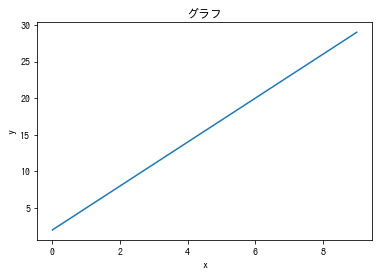

In [178]:
plt.plot(np.arange(10), np.arange(10) * 3 + 2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("グラフ")

# 散布図, マーカー, 線, 色, 重ねる, xlim, ylim, 太さ, alpha, legend, subplot
# ファイル出力, 大きさ, fontサイズ, 棒グラフ, エラーバー, 面グラフ, 円グラフ, 
# 軸ラベルの回転, annotation, boxplot, バイオリンプロット, 2軸プロット, 
# テーマ

Text(0, 0.5, 'y: 日本語')

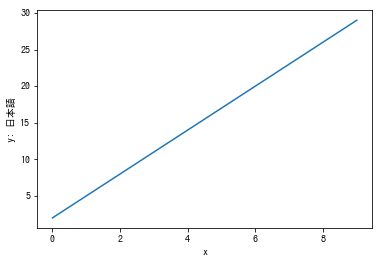

In [179]:
plt.plot(np.arange(10), np.arange(10) * 3 + 2)
plt.xlabel("x")
plt.ylabel("y: 日本語")